<a href="https://colab.research.google.com/github/Nonbangkok/AstroCode/blob/main/astrocode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  โจทย์ข้อ 2. กฎของฮับเบิลและการประมาณอายุของเอกภพ
    
นายกิตติธัช ทิพย์มณฑา ม.5 โรงเรียนเบญจมราชูทิศ (nonbangkokgamer@gmail.com) [Kittitouch Thipmontha] \
นายธนกฤต โพธิ์นิ่มไทย ม.5 โรงเรียนดรุณสิกขาลัย (jadai.tk007@gmail.com) [Thanakrit Ponimthai] \
นางสาวนวินดา เลิศเพ็ญเมธา ม.5 โรงเรียนดรุณสิกขาลัย (tanyaporn.kes@gmail.com) [Navinda Lertpenmetha] \
ครูที่ปรึกษา: ผศ.ดร. เอกพงษ์ หิรัญสิริสวัสดิ์  โรงเรียนดรุณสิกขาลัย (ekapong.hir@kmutt.ac.th) [Ekapong Hirunsirisawat]

# Install nescessory library

In [1]:
!pip install sortedcontainers
!pip install sklearn
!pip install matplotlib
!pip install scipy
!pip install pandas
!pip install numpy
!pip install requests
!pip install astropy

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Import necessary library

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from astropy import units as u
from astropy import constants as const
from sortedcontainers import SortedList
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import requests


# Get data from link google drive

In [3]:
url = 'https://drive.google.com/file/d/1DeceWp9HT1cjBx0AMoOXQ8WSSd5c26ck/view'

file_id = url.split('/')[-2]

download_url = f'https://drive.google.com/uc?id={file_id}&export=download'

response = requests.get(download_url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
else:
    print(f"Error: {response.status_code} - Unable to download JSON file")

df['m'] = data['Apparent Magitude (m)']
df['M'] = data['Absolute Magnitude (M)']
df['z'] = data['Redshift (z)']

df

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z),m,M,z
0,14.541391,-16.339065,0.003676,14.541391,-16.339065,0.003676
1,16.756129,-18.177730,0.022604,16.756129,-18.177730,0.022604
2,15.829605,-16.696145,0.008038,15.829605,-16.696145,0.008038
3,16.294575,-19.512265,0.036352,16.294575,-19.512265,0.036352
4,13.829094,-19.665756,0.010395,13.829094,-19.665756,0.010395
5,14.182569,-21.249230,0.033587,14.182569,-21.249230,0.033587
6,16.039077,-17.778063,0.014448,16.039077,-17.778063,0.014448
7,17.138868,-17.656339,0.017838,17.138868,-17.656339,0.017838
8,15.998251,-19.397655,0.030485,15.998251,-19.397655,0.030485
9,17.910487,-16.931928,0.025338,17.910487,-16.931928,0.025338


# Plot the Dataset

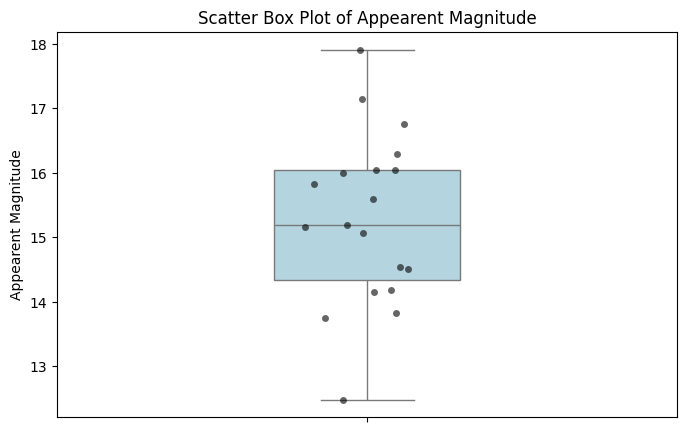

In [4]:
# Create the figure
plt.figure(figsize=(8, 5))

# Box plot (distribution summary)
sns.boxplot(y=df['m'], width=0.3, fliersize=0, color='lightblue')

# Scatter plot (individual points)
sns.stripplot(y=df['m'], jitter=True, color='black', alpha=0.6)

# Labels and title
plt.ylabel("Appearent Magnitude")
plt.title("Scatter Box Plot of Appearent Magnitude")

# Show the plot
plt.show()

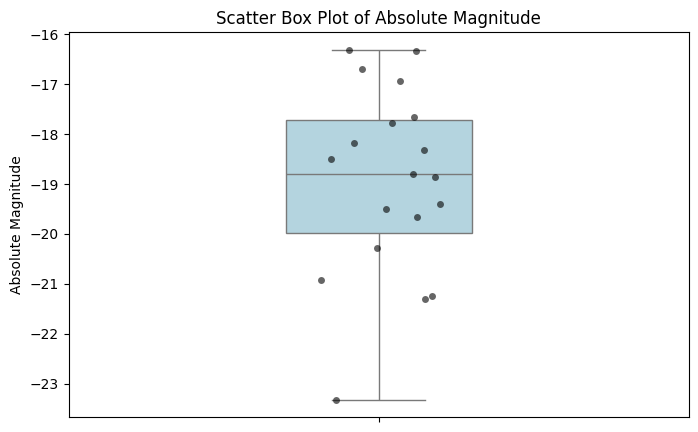

In [5]:
# Create the figure
plt.figure(figsize=(8, 5))

# Box plot (distribution summary)
sns.boxplot(y=df['M'], width=0.3, fliersize=0, color='lightblue')

# Scatter plot (individual points)
sns.stripplot(y=df['M'], jitter=True, color='black', alpha=0.6)

# Labels and title
plt.ylabel("Absolute Magnitude")
plt.title("Scatter Box Plot of Absolute Magnitude")

# Show the plot
plt.show()

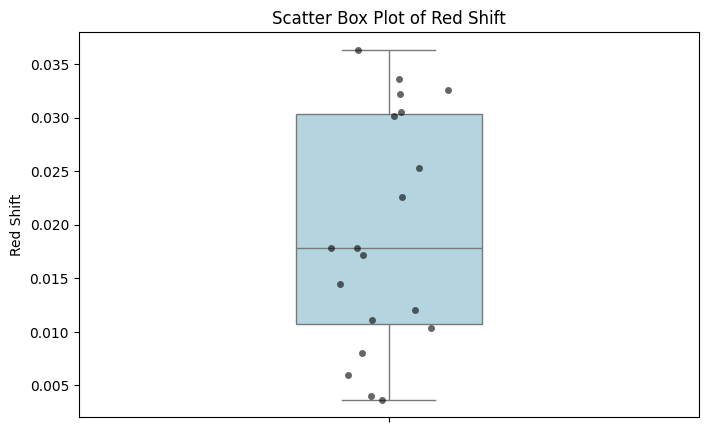

In [6]:
# Create the figure
plt.figure(figsize=(8, 5))

# Box plot (distribution summary)
sns.boxplot(y=df['z'], width=0.3, fliersize=0, color='lightblue')

# Scatter plot (individual points)
sns.stripplot(y=df['z'], jitter=True, color='black', alpha=0.6)

# Labels and title
plt.ylabel("Red Shift")
plt.title("Scatter Box Plot of Red Shift")

# Show the plot
plt.show()

# Calculate distance and recession velocity of galaxy



In [7]:
df['d'] = pow(10, (df['m'] - df['M'] + 5) / 5) # distance = 10^((m - M + 5) / 5), m = Apparent Magitude, M = Absolute Magnitude
df['v'] = df['z'] * const.c # recession velocity of galaxy = z * c; c = speed of light, z = redshift
df['d'] /= 1e6 # transform unit from pc to Mpc
df['v'] /= 1e3; # transform unit from m/s to km/s

df # print dataFrame for easy to debug

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z),m,M,z,d,v
0,14.541391,-16.339065,0.003676,14.541391,-16.339065,0.003676,15.0,1102.027175
1,16.756129,-18.177730,0.022604,16.756129,-18.177730,0.022604,97.0,6776.580838
2,15.829605,-16.696145,0.008038,15.829605,-16.696145,0.008038,32.0,2409.687714
3,16.294575,-19.512265,0.036352,16.294575,-19.512265,0.036352,145.0,10897.970095
4,13.829094,-19.665756,0.010395,13.829094,-19.665756,0.010395,50.0,3116.199574
5,14.182569,-21.249230,0.033587,14.182569,-21.249230,0.033587,122.0,10069.014985
6,16.039077,-17.778063,0.014448,16.039077,-17.778063,0.014448,58.0,4331.291811
7,17.138868,-17.656339,0.017838,17.138868,-17.656339,0.017838,91.0,5347.696740
8,15.998251,-19.397655,0.030485,15.998251,-19.397655,0.030485,120.0,9139.257376
9,17.910487,-16.931928,0.025338,17.910487,-16.931928,0.025338,93.0,7596.218815


# Distribution of distance and recession velocity

In [8]:
median_values = df['v'].median()
print("Median values:")
print(median_values)

mode_values = df['v'].mode()
print("\nMode values:")
print(mode_values)

mean_values = df['v'].mean()
print("\nMean values:")
print(mean_values)

# Mean > Mode > Median

Median values:
5347.6967399742625

Mode values:
0    5347.69674
Name: v, dtype: float64

Mean values:
5772.431763775484


In [9]:
median_values = df['d'].median()
print("Median values:")
print(median_values)

mode_values = df['d'].mode()
print("\nMode values:")
print(mode_values)

mean_values = df['d'].mean()
print("\nMean values:")
print(mean_values)

# Mode > Median > Mean

Median values:
91.00000000000024

Mode values:
0    145.0
Name: d, dtype: float64

Mean values:
86.26315789473692


# Plot chart of distance and recession velocity

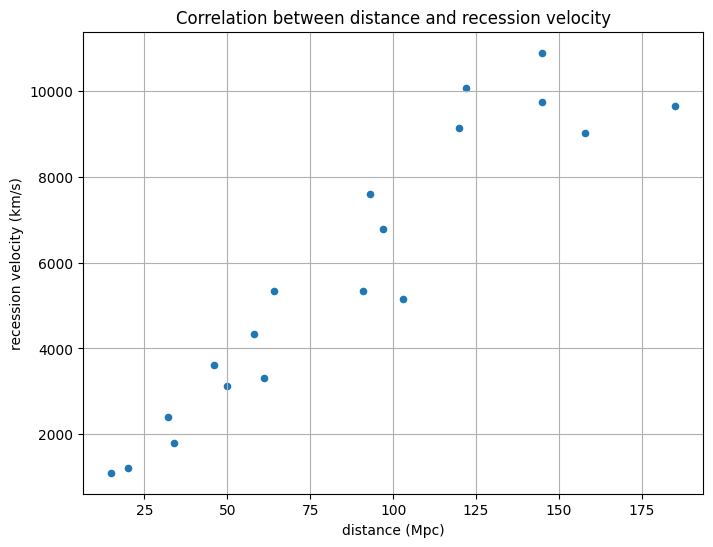

In [10]:
# Plot Correlation between distance and recession velocity
plt.figure(figsize=(8, 6))
plt.scatter(df['d'], df['v'], s=20)
plt.xlabel('distance (Mpc)')
plt.ylabel('recession velocity (km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)
plt.show()

In [11]:
# sort the data with distance
new = df.sort_values(by='d', ascending=True)
new.reset_index(drop=True, inplace=True)
new

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z),m,M,z,d,v
0,14.541391,-16.339065,0.003676,14.541391,-16.339065,0.003676,15.0,1102.027175
1,15.192141,-16.313009,0.004011,15.192141,-16.313009,0.004011,20.0,1202.413144
2,15.829605,-16.696145,0.008038,15.829605,-16.696145,0.008038,32.0,2409.687714
3,14.147030,-18.510365,0.006022,14.147030,-18.510365,0.006022,34.0,1805.439097
4,14.504531,-18.809258,0.012081,14.504531,-18.809258,0.012081,46.0,3621.882445
5,13.829094,-19.665756,0.010395,13.829094,-19.665756,0.010395,50.0,3116.199574
6,16.039077,-17.778063,0.014448,16.039077,-17.778063,0.014448,58.0,4331.291811
7,15.601659,-18.324991,0.011069,15.601659,-18.324991,0.011069,61.0,3318.369258
8,15.164040,-18.866860,0.017838,15.164040,-18.866860,0.017838,64.0,5347.696740
9,17.138868,-17.656339,0.017838,17.138868,-17.656339,0.017838,91.0,5347.696740


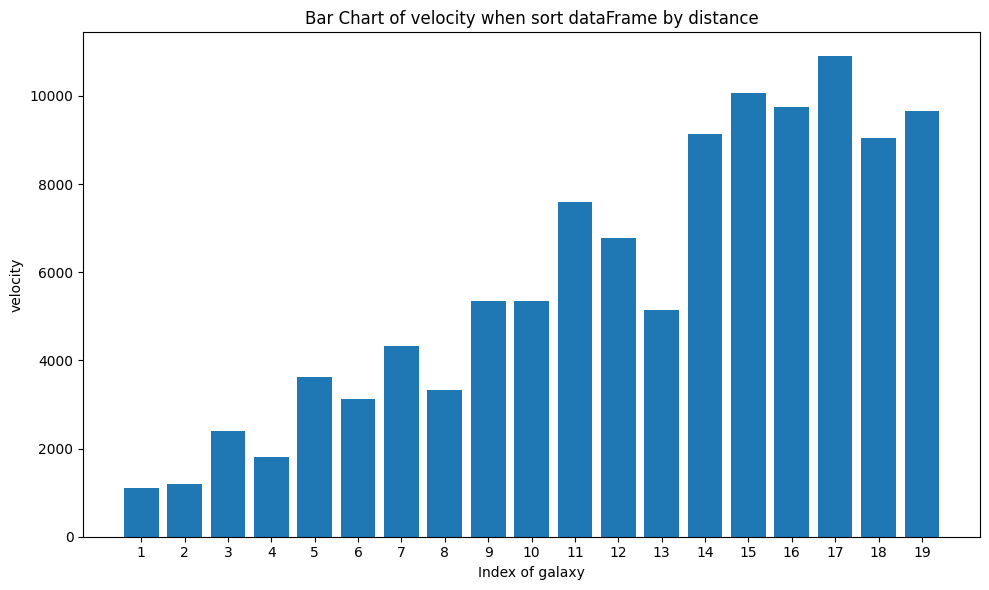

In [12]:
# plot bar chart of velocity when sort Dataframe by distance
plt.figure(figsize=(10, 6))
plt.bar(new.index, new['v'])
plt.xlabel("Index of galaxy")
plt.ylabel("velocity")
plt.title("Bar Chart of velocity when sort dataFrame by distance")
plt.xticks(range(len(new)), range(1, len(new) + 1))
plt.tight_layout()
plt.show()

# First Regression

## Linear regression for calculate Hubble constant

In [13]:
df

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z),m,M,z,d,v
0,14.541391,-16.339065,0.003676,14.541391,-16.339065,0.003676,15.0,1102.027175
1,16.756129,-18.177730,0.022604,16.756129,-18.177730,0.022604,97.0,6776.580838
2,15.829605,-16.696145,0.008038,15.829605,-16.696145,0.008038,32.0,2409.687714
3,16.294575,-19.512265,0.036352,16.294575,-19.512265,0.036352,145.0,10897.970095
4,13.829094,-19.665756,0.010395,13.829094,-19.665756,0.010395,50.0,3116.199574
5,14.182569,-21.249230,0.033587,14.182569,-21.249230,0.033587,122.0,10069.014985
6,16.039077,-17.778063,0.014448,16.039077,-17.778063,0.014448,58.0,4331.291811
7,17.138868,-17.656339,0.017838,17.138868,-17.656339,0.017838,91.0,5347.696740
8,15.998251,-19.397655,0.030485,15.998251,-19.397655,0.030485,120.0,9139.257376
9,17.910487,-16.931928,0.025338,17.910487,-16.931928,0.025338,93.0,7596.218815


Slope(H0): 65.6299463885447
Error(MSE): 1259379.1688940628
Error(H0): 5.974288841626507
Standard Error of the Slope: 5.6122455960570115 km / (Mpc s)


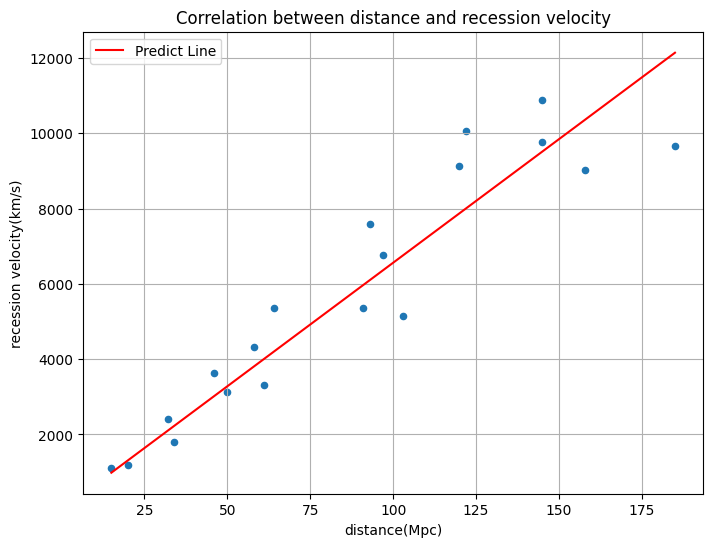

In [14]:
# do linear regression and find slope of predict line for H0
plt.figure(figsize = (8, 6))
plt.scatter(df['d'], df['v'],  s = 20)
plt.xlabel('distance(Mpc)')
plt.ylabel('recession velocity(km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)

X = df[['d']].values
y = df['v'].values
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
x_range = np.linspace(df['d'].min(), df['d'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Predict Line')

True_Hubble = 69.8
slope = model.coef_[0]
errorMSE = mean_squared_error(y, model.predict(X))
errorH0 = abs(True_Hubble - slope)/True_Hubble * 100

residuals = y - model.predict(X)
std_err_regression = np.sqrt(np.sum(residuals**2) / (len(X) - 2))
std_err_slope = std_err_regression / np.sqrt(np.sum((X[:, 0] - np.mean(X[:, 0]))**2))
std_err_slope = std_err_slope * u.km / u.s / u.Mpc

print(f"Slope(H0): {slope}")
print(f"Error(MSE): {errorMSE}")
print(f"Error(H0): {errorH0}")
print(f"Standard Error of the Slope: {std_err_slope}")

plt.legend()
plt.show()


## Calculate age of universe

In [15]:
# Define the slope (Hubble constant) with proper units
slope = slope * u.km / u.s / u.Mpc  # Ensure slope has units of km/s/Mpc
print(slope)

# Convert the slope to units of 1/s (inverse time)
H0_in_s = slope.to(1 / u.s)  # Convert km/s/Mpc to 1/s

# Calculate the age of the universe in seconds
age_of_universe_seconds = 1 / H0_in_s
age_of_universe_years = age_of_universe_seconds.to(u.year)

print(f"age of universe is {age_of_universe_years} year or {age_of_universe_years / 1e9 :.2f} billion years")

# Calculate error of age of universe
error_age_of_universe_years = std_err_slope / (slope) * age_of_universe_years
print(f"Error Propagation of age of universe is {error_age_of_universe_years} years or {error_age_of_universe_years/1e9:.2f} billion years")

65.6299463885447 km / (Mpc s)
age of universe is 14898568039.23059 yr year or 14.90 yr billion years
Error Propagation of age of universe is 1274028510.8677464 yr years or 1.27 yr billion years


## Confidence Interval

Slope (H0): 65.6299463885447 km / (Mpc s)
Standard Error of Slope: 5.6122455960570115 km / (Mpc s)
95% Confidence Interval for Slope: [53.78914320335795 km / (Mpc s), 77.47074957373144 km / (Mpc s)]


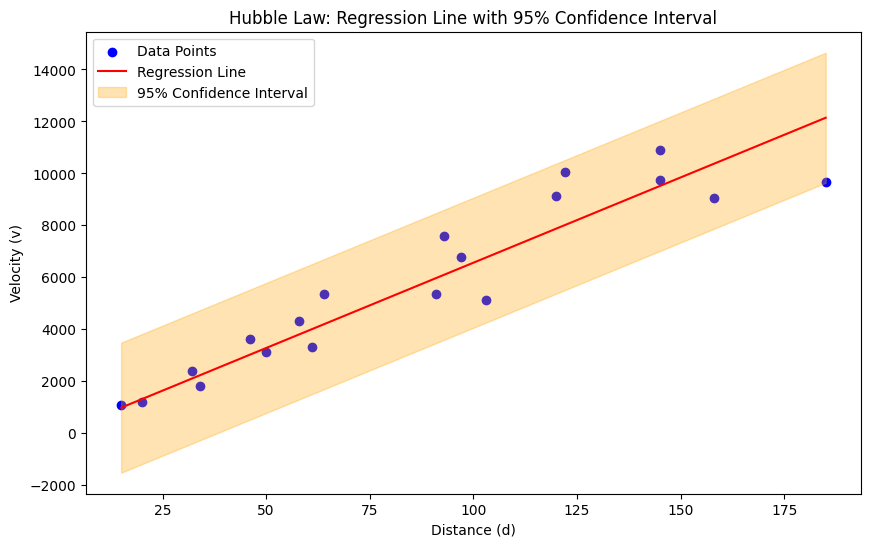

In [16]:
# Confidence level at 95%
alpha = 0.05

# Degrees of freedom (n - 2 for simple linear regression)
deg_of_freedom = len(X) - 2

# Critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha / 2, deg_of_freedom)

# Margin of error
margin_of_error = t_critical * std_err_slope

# Confidence interval for the slope
slope_ci_lower = slope - margin_of_error
slope_ci_upper = slope + margin_of_error

print(f"Slope (H0): {slope}")
print(f"Standard Error of Slope: {std_err_slope}")
print(f"95% Confidence Interval for Slope: [{slope_ci_lower}, {slope_ci_upper}]")

# Compute confidence intervals for the predicted values
y_pred_lower = y_pred - t_critical * std_err_regression
y_pred_upper = y_pred + t_critical * std_err_regression

# Plot the regression line and confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.fill_between(x_range, y_pred_lower, y_pred_upper, color='orange', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Distance (d)')
plt.ylabel('Velocity (v)')
plt.title('Hubble Law: Regression Line with 95% Confidence Interval')
plt.legend()
plt.show()

## Cook's distance

Cook's Distance for each observation:
[1.26056276e-05 7.10998571e-03 4.01029319e-04 2.06225991e-01
 2.83727882e-04 3.02314564e-01 3.88414025e-03 1.43069658e-02
 1.09211244e-01 8.56827640e-02 2.39353418e-01 2.27922597e-02
 6.34907150e-03 7.35086388e-03 1.25919196e-01 3.18145972e-03
 8.58670332e-04 1.28414583e+00 1.97178413e-05]


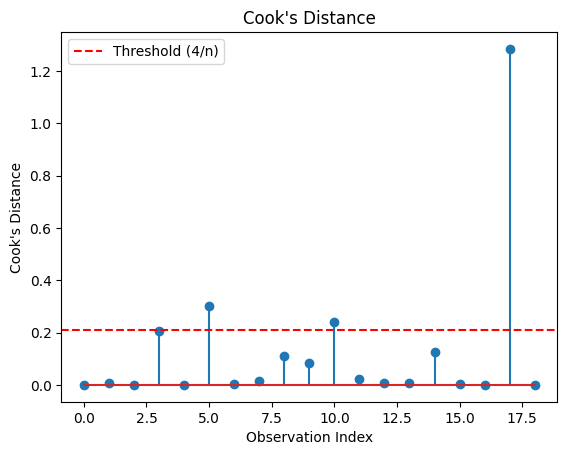

In [17]:
# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]

# Print Cook's distance for each observation
print("Cook's Distance for each observation:")
print(cooks_distance)

# Plot Cook's distance
plt.stem(np.arange(len(cooks_distance)), cooks_distance)
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(y=4 / len(X), color='r', linestyle='--', label="Threshold (4/n)")
plt.legend()
plt.show()

## identify outlier in Regression

Slope(H0): 65.6299463885447
Error(MSE): 1259379.1688940628
Error(H0): 5.974288841626507%
Standard Error of the Slope: 5.6122455960570115


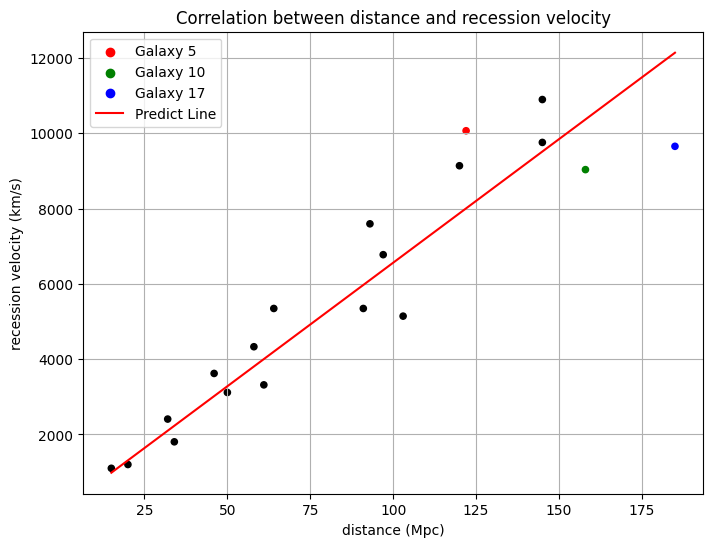

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(8, 6))

# กำหนดสีให้แต่ละจุด
colors = ['red' if i == 5 else 'green' if i == 10 else 'blue' if i == 17 else 'black' for i in range(len(df['d']))]

# Plot จุดข้อมูลด้วยสีที่กำหนด
plt.scatter(df['d'], df['v'], s=20, c=colors)

plt.xlabel('distance (Mpc)')
plt.ylabel('recession velocity (km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)

# เพิ่ม legend สำหรับสีของจุด
plt.scatter([], [], color='red', label='Galaxy 5')
plt.scatter([], [], color='green', label='Galaxy 10')
plt.scatter([], [], color='blue', label='Galaxy 17')

# Linear Regression
X = df[['d']].values
y = df['v'].values
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# เส้นคาดการณ์
x_range = np.linspace(df['d'].min(), df['d'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Predict Line')

# คำนวณค่า H0 และ Error
True_Hubble = 69.8
slope = model.coef_[0]
errorMSE = mean_squared_error(y, model.predict(X))
errorH0 = abs(True_Hubble - slope) / True_Hubble * 100

residuals = y - model.predict(X)
std_err_regression = np.sqrt(np.sum(residuals**2) / (len(X) - 2))
std_err_slope = std_err_regression / np.sqrt(np.sum((X[:, 0] - np.mean(X[:, 0]))**2))

print(f"Slope(H0): {slope}")
print(f"Error(MSE): {errorMSE}")
print(f"Error(H0): {errorH0}%")
print(f"Standard Error of the Slope: {std_err_slope}")

plt.legend()
plt.show()


## Find outllier

In [19]:
# use IQR to find outlier
Q1 = df['d'].quantile(0.25)
Q3 = df['d'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['d'] > upper_bound) | (df['d'] < lower_bound)]

print("Outliers:")
print(outliers)

# No outliers

Outliers:
Empty DataFrame
Columns: [Apparent Magitude (m), Absolute Magnitude (M), Redshift (z), m, M, z, d, v]
Index: []


In [20]:
# Compute Z-scores
df['values'] = df['m']
df['z_score'] = (df['values'] - df['values'].mean()) / df['values'].std()

# Define threshold (commonly 3 or -3)
threshold = 3
outliers = df[np.abs(df['z_score']) > threshold]

print(outliers)

# No outliers

Empty DataFrame
Columns: [Apparent Magitude (m), Absolute Magnitude (M), Redshift (z), m, M, z, d, v, values, z_score]
Index: []


In [21]:
def sigma_clipping(data, sigma=3, max_iters=5):
    data = np.array(data)  # แปลงข้อมูลเป็น NumPy array
    mask = np.ones(len(data), dtype=bool)  # สร้าง mask เริ่มต้น (เก็บทุกค่า)

    for _ in range(max_iters):
        median = np.median(data[mask])  # คำนวณค่าเฉลี่ยของข้อมูลที่เหลือ
        std = np.std(data[mask])   # คำนวณค่าเบี่ยงเบนมาตรฐานของข้อมูลที่เหลือ

        # คำนวณขอบเขตการตัด
        lower_bound = median - (sigma * std)
        upper_bound = median + (sigma * std)

        # อัปเดต mask โดยเก็บเฉพาะข้อมูลที่อยู่ในขอบเขต
        new_mask = (data >= lower_bound) & (data <= upper_bound)

        # หยุดการทำซ้ำถ้า mask ไม่เปลี่ยนแปลง
        if np.all(new_mask == mask):
            break

        mask = new_mask

    filtered_data = data[mask]  # กรองข้อมูล
    return filtered_data, mask

# ตัวอย่างการใช้งาน
data = df['v']  # ข้อมูลตัวอย่าง (มีค่าผิดปกติคือ 100)
filtered_data, mask = sigma_clipping(data, sigma=5, max_iters=5)

print("ข้อมูลต้นฉบับ:", data)
print("ข้อมูลที่กรองแล้ว:", filtered_data)
print("Mask ที่ใช้กรอง:", mask)

# No outliers

ข้อมูลต้นฉบับ: 0      1102.027175
1      6776.580838
2      2409.687714
3     10897.970095
4      3116.199574
5     10069.014985
6      4331.291811
7      5347.696740
8      9139.257376
9      7596.218815
10     9036.133979
11     5347.696740
12     9758.765602
13     3318.369258
14     5144.135487
15     3621.882445
16     1805.439097
17     9655.422637
18     1202.413144
Name: v, dtype: float64
ข้อมูลที่กรองแล้ว: [ 1102.02717461  6776.58083794  2409.68771404 10897.97009507
  3116.19957399 10069.01498452  4331.29181072  5347.69673997
  9139.25737589  7596.21881549  9036.13397941  5347.69673997
  9758.76560163  3318.3692583   5144.13548681  3621.88244544
  1805.43909677  9655.42263673  1202.41314441]
Mask ที่ใช้กรอง: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


## Mark The Data Point

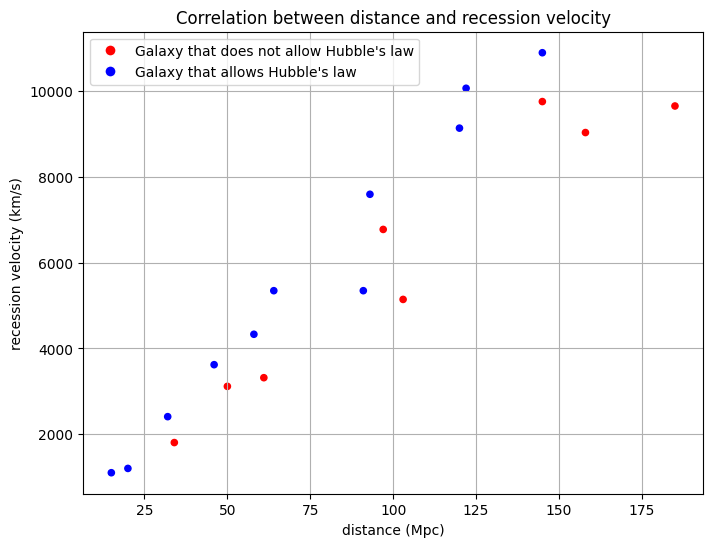

In [22]:
# make different color of galaxy i on scatter plot when galaxy i does not allow Hubble's law
D = df['d']
V = df['v']
galaxies = list(zip(D, V))
galaxies.sort()

unique_distances = sorted(set(d for d, _ in galaxies))
distance_map = {d: i + 1 for i, d in enumerate(unique_distances)}

class FenwickTree:
    def __init__(self, size):
        self.size = size
        self.tree = [float('-inf')] * (size + 1)

    def update(self, idx, value):
        while idx <= self.size:
            self.tree[idx] = max(self.tree[idx], value)
            idx += idx & -idx

    def query(self, idx):
        max_value = float('-inf')
        while idx > 0:
            max_value = max(max_value, self.tree[idx])
            idx -= idx & -idx
        return max_value

ft = FenwickTree(len(unique_distances))

colors = []
for d, v in galaxies:
    compressed_d = distance_map[d]
    max_v = ft.query(compressed_d - 1)
    # use Fenwick Tree Datastructure and greedy algorithm to optimize code from O(n^2) to O(nlogn)
    if max_v > v:
        # If Galaxy i does not allow Hubble's law, its color will be red;
        colors.append('red')
    else:
        # If Galaxy i allows Hubble's law, its color will be blue.
        colors.append('blue')
    ft.update(compressed_d, v)

original_order_colors = [colors[galaxies.index((d, v))] for d, v in zip(df['d'], df['v'])]

plt.figure(figsize=(8, 6))
plt.scatter(df['d'], df['v'], c = original_order_colors, s=20)
plt.xlabel('distance (Mpc)')
plt.ylabel('recession velocity (km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Galaxy that does not allow Hubble\'s law', markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Galaxy that allows Hubble\'s law', markerfacecolor='blue', markersize=8)
]
plt.legend(handles=legend_elements)
plt.show()

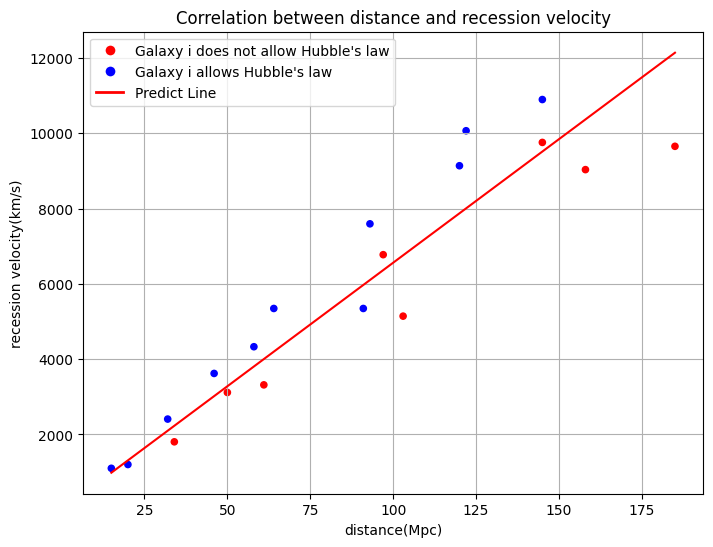

In [23]:
# do regression on marking galaxy
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['d'], df['v'], c=original_order_colors, s=20)
plt.xlabel('distance(Mpc)')
plt.ylabel('recession velocity(km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)

plt.plot(x_range, y_pred, color='red', label='Predict Line')

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Galaxy i does not allow Hubble\'s law', markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Galaxy i allows Hubble\'s law', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], color='red', lw=2, label='Predict Line')
]
plt.legend(handles=legend_elements)

plt.show()

## Graphical Identification of Outliers

In [24]:
# This Cell have deleting the ourlier

s = np.sqrt((errorMSE * len(X)) / (len(X) - 2))

outlier_indices = []

# Iterate over the DataFrame
for i, row in df.iterrows():
    predicted_value = model.predict(np.array(row['d']).reshape(-1, 1))
    residual = abs(row['v'] - predicted_value)

    if residual > 2 * s:
        print(f"Galaxy {i+1} is an outlier")
        print(f"Observed value: {row['v']}, Predicted value: {predicted_value[0]}")
        outlier_indices.append(i)  # Store the index of the outlier

# Drop the outliers from the DataFrame
df_cleaned = df.drop(outlier_indices)
df_cleaned = df_cleaned.reset_index(drop=True)

print("\nDataFrame after removing outliers:")
print(df_cleaned)

Galaxy 18 is an outlier
Observed value: 9655.42263673402, Predicted value: 12141.540081880767

DataFrame after removing outliers:
    Apparent Magitude (m)  Absolute Magnitude (M)  Redshift (z)          m  \
0               14.541391              -16.339065      0.003676  14.541391   
1               16.756129              -18.177730      0.022604  16.756129   
2               15.829605              -16.696145      0.008038  15.829605   
3               16.294575              -19.512265      0.036352  16.294575   
4               13.829094              -19.665756      0.010395  13.829094   
5               14.182569              -21.249230      0.033587  14.182569   
6               16.039077              -17.778063      0.014448  16.039077   
7               17.138868              -17.656339      0.017838  17.138868   
8               15.998251              -19.397655      0.030485  15.998251   
9               17.910487              -16.931928      0.025338  17.910487   
10          

# Second Regression

## Regress with delete Outlier 1

Slope(H0): 68.65884191138427
Error(MSE): 908574.3948964116
Error(H0): 1.6348969750941622
Standard Error of the Slope: 5.451242765865145 km / (Mpc s)


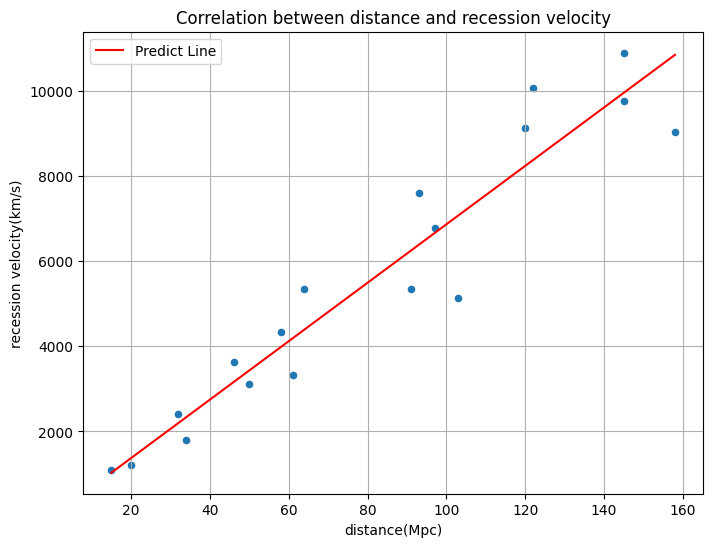

In [25]:
# do regression on making galaxy
original_order_colors = [colors[galaxies.index((d, v))] for d, v in zip(df_cleaned['d'], df_cleaned['v'])]
plt.figure(figsize = (8, 6))
plt.scatter(df_cleaned['d'], df_cleaned['v'],  s = 20)
plt.xlabel('distance(Mpc)')
plt.ylabel('recession velocity(km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)

X = df_cleaned[['d']].values
y = df_cleaned['v'].values
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
x_range = np.linspace(df_cleaned['d'].min(), df_cleaned['d'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Predict Line')

True_Hubble = 69.8
slope = model.coef_[0]
errorMSE = mean_squared_error(y, model.predict(X))
errorH0 = abs(True_Hubble - slope)/True_Hubble * 100

residuals = y - model.predict(X)
std_err_regression = np.sqrt(np.sum(residuals**2) / (len(X) - 2))
std_err_slope = std_err_regression / np.sqrt(np.sum((X[:, 0] - np.mean(X[:, 0]))**2))
std_err_slope = std_err_slope * u.km / u.s / u.Mpc

print(f"Slope(H0): {slope}")
print(f"Error(MSE): {errorMSE}")
print(f"Error(H0): {errorH0}")
print(f"Standard Error of the Slope: {std_err_slope}")

plt.legend()
plt.show()

## Calculate age of Universe

In [26]:
# Define the slope (Hubble constant) with proper units
slope = slope * u.km / u.s / u.Mpc  # Ensure slope has units of km/s/Mpc

# Convert the slope to units of 1/s (inverse time)
H0_in_s = slope.to(1 / u.s)  # Convert km/s/Mpc to 1/s

# Calculate the age of the universe in seconds
age_of_universe_seconds = 1 / H0_in_s
age_of_universe_years = age_of_universe_seconds.to(u.year)

print(f"age of universe is {age_of_universe_years} year or {age_of_universe_years / 1e9 :.2f} billion years")

# Calculate error of age of universe
error_age_of_universe_years = std_err_slope / (slope) * age_of_universe_years
print(f"Error Propagation of age of universe is {error_age_of_universe_years} years or {error_age_of_universe_years/1e9:.2f} billion years")

age of universe is 14241315385.75605 yr year or 14.24 yr billion years
Error Propagation of age of universe is 1130704586.7916746 yr years or 1.13 yr billion years


## Confidence Interval

Slope (H0): 68.65884191138427 km / (Mpc s)
Standard Error of Slope: 5.451242765865145 km / (Mpc s)
95% Confidence Interval for Slope: [57.10272348468655 km / (Mpc s), 80.214960338082 km / (Mpc s)]


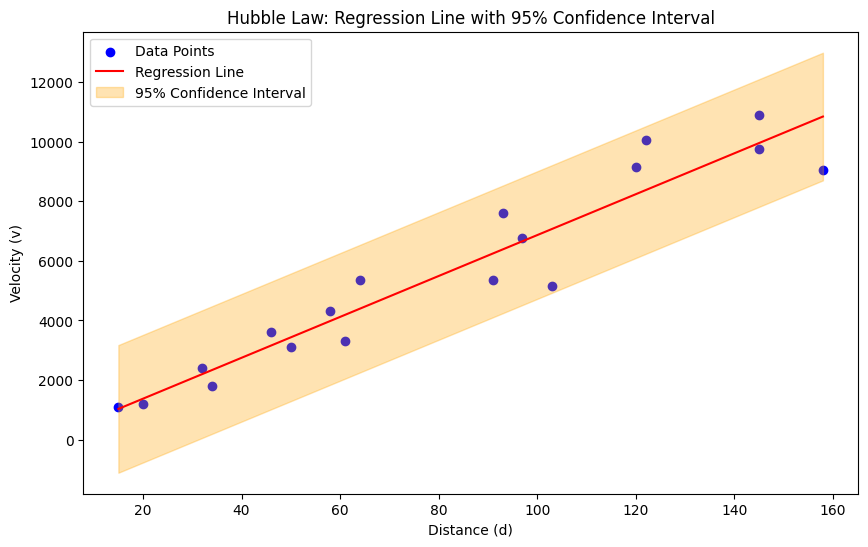

In [27]:
# Confidence level at 95%
alpha = 0.05

# Degrees of freedom (n - 2 for simple linear regression)
deg_of_freedom = len(X) - 2

# Critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha / 2, deg_of_freedom)

# Margin of error
margin_of_error = t_critical * std_err_slope

# Confidence interval for the slope
slope_ci_lower = slope - margin_of_error
slope_ci_upper = slope + margin_of_error

print(f"Slope (H0): {slope}")
print(f"Standard Error of Slope: {std_err_slope}")
print(f"95% Confidence Interval for Slope: [{slope_ci_lower}, {slope_ci_upper}]")

# Compute confidence intervals for the predicted values
y_pred_lower = y_pred - t_critical * std_err_regression
y_pred_upper = y_pred + t_critical * std_err_regression

# Plot the regression line and confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.fill_between(x_range, y_pred_lower, y_pred_upper, color='orange', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Distance (d)')
plt.ylabel('Velocity (v)')
plt.title('Hubble Law: Regression Line with 95% Confidence Interval')
plt.legend()
plt.show()

## Cook's distance

Cook's Distance for each observation:
[8.04052405e-06 9.96443434e-04 3.21166373e-04 1.72225871e-01
 1.77492058e-03 3.58805494e-01 2.93473617e-03 5.13963632e-02
 9.74956263e-02 9.76249560e-02 8.03570752e-01 2.69269841e-02
 7.50749425e-03 2.02523345e-02 3.11946734e-01 3.20149457e-03
 2.24828111e-03 8.02692096e-05]


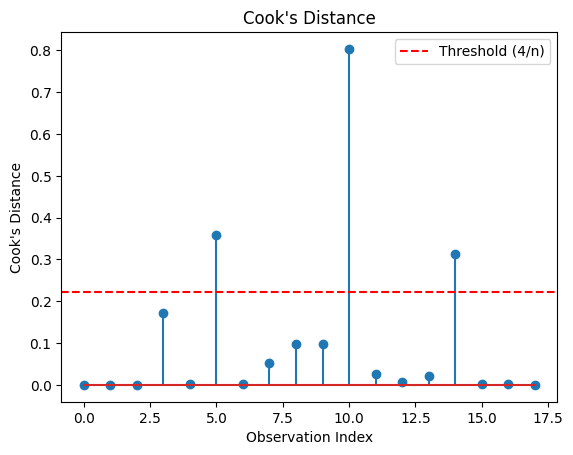

In [28]:
# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]

# Print Cook's distance for each observation
print("Cook's Distance for each observation:")
print(cooks_distance)

# Plot Cook's distance
plt.stem(np.arange(len(cooks_distance)), cooks_distance)
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(y=4 / len(X), color='r', linestyle='--', label="Threshold (4/n)")
plt.legend()
plt.show()

## Delete the outlier from Cook's distance plot

In [29]:
# Identify and store the index of the outlier
outlier_index = 10

# Drop the outlier from the DataFrame and reset the index
df_cleaned = df_cleaned.drop(outlier_index).reset_index(drop=True)

# Print the cleaned DataFrame
print("\nDataFrame after removing outliers:")
print(df_cleaned)


DataFrame after removing outliers:
    Apparent Magitude (m)  Absolute Magnitude (M)  Redshift (z)          m  \
0               14.541391              -16.339065      0.003676  14.541391   
1               16.756129              -18.177730      0.022604  16.756129   
2               15.829605              -16.696145      0.008038  15.829605   
3               16.294575              -19.512265      0.036352  16.294575   
4               13.829094              -19.665756      0.010395  13.829094   
5               14.182569              -21.249230      0.033587  14.182569   
6               16.039077              -17.778063      0.014448  16.039077   
7               17.138868              -17.656339      0.017838  17.138868   
8               15.998251              -19.397655      0.030485  15.998251   
9               17.910487              -16.931928      0.025338  17.910487   
10              15.164040              -18.866860      0.017838  15.164040   
11              12.484639   

# Third Regression

## Regress with delete outliers 2

Slope(H0): 70.9151560308143
Error(MSE): 730892.2652060376
Error(H0): 1.5976447432869696
Standard Error of the Slope: 5.431043850155169 km / (Mpc s)


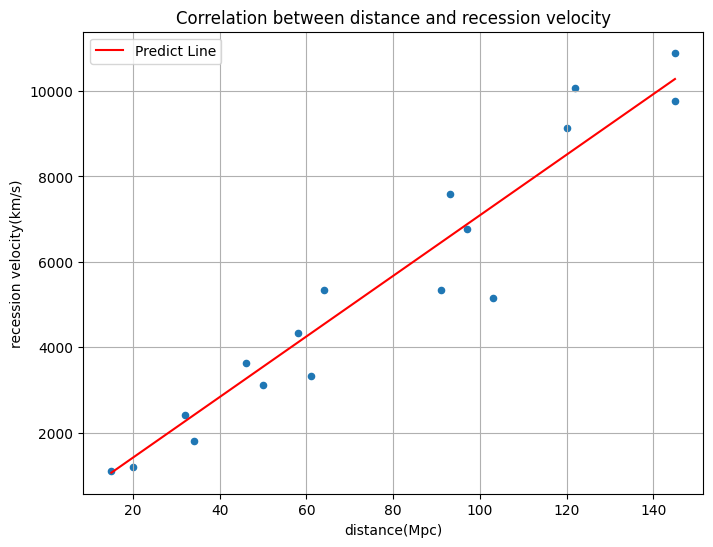

In [30]:
# do regression on making galaxy
original_order_colors = [colors[galaxies.index((d, v))] for d, v in zip(df_cleaned['d'], df_cleaned['v'])]
plt.figure(figsize = (8, 6))
plt.scatter(df_cleaned['d'], df_cleaned['v'],  s = 20)
plt.xlabel('distance(Mpc)')
plt.ylabel('recession velocity(km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)

X = df_cleaned[['d']].values
y = df_cleaned['v'].values
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
x_range = np.linspace(df_cleaned['d'].min(), df_cleaned['d'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Predict Line')

True_Hubble = 69.8
slope = model.coef_[0]
errorMSE = mean_squared_error(y, model.predict(X))
errorH0 = abs(True_Hubble - slope)/True_Hubble * 100

residuals = y - model.predict(X)
std_err_regression = np.sqrt(np.sum(residuals**2) / (len(X) - 2))
std_err_slope = std_err_regression / np.sqrt(np.sum((X[:, 0] - np.mean(X[:, 0]))**2))
std_err_slope = std_err_slope * u.km / u.s / u.Mpc

print(f"Slope(H0): {slope}")
print(f"Error(MSE): {errorMSE}")
print(f"Error(H0): {errorH0}")
print(f"Standard Error of the Slope: {std_err_slope}")

plt.legend()
plt.show()

## Calculate age of Universe

In [31]:
# Define the slope (Hubble constant) with proper units
slope = slope * u.km / u.s / u.Mpc  # Ensure slope has units of km/s/Mpc

# Convert the slope to units of 1/s (inverse time)
H0_in_s = slope.to(1 / u.s)  # Convert km/s/Mpc to 1/s

# Calculate the age of the universe in seconds
age_of_universe_seconds = 1 / H0_in_s
age_of_universe_years = age_of_universe_seconds.to(u.year)

print(f"age of universe is {age_of_universe_years} year or {age_of_universe_years / 1e9 :.2f} billion years")

# Calculate error of age of universe
error_age_of_universe_years = std_err_slope / (slope) * age_of_universe_years
print(f"Error Propagation of age of universe is {error_age_of_universe_years} years or {error_age_of_universe_years/1e9:.2f} billion years")

age of universe is 13788198128.70348 yr year or 13.79 yr billion years
Error Propagation of age of universe is 1055970441.9049301 yr years or 1.06 yr billion years


## Confidence Interval

Slope (H0): 70.9151560308143 km / (Mpc s)
Standard Error of Slope: 5.431043850155169 km / (Mpc s)
95% Confidence Interval for Slope: [59.33916008448831 km / (Mpc s), 82.49115197714029 km / (Mpc s)]


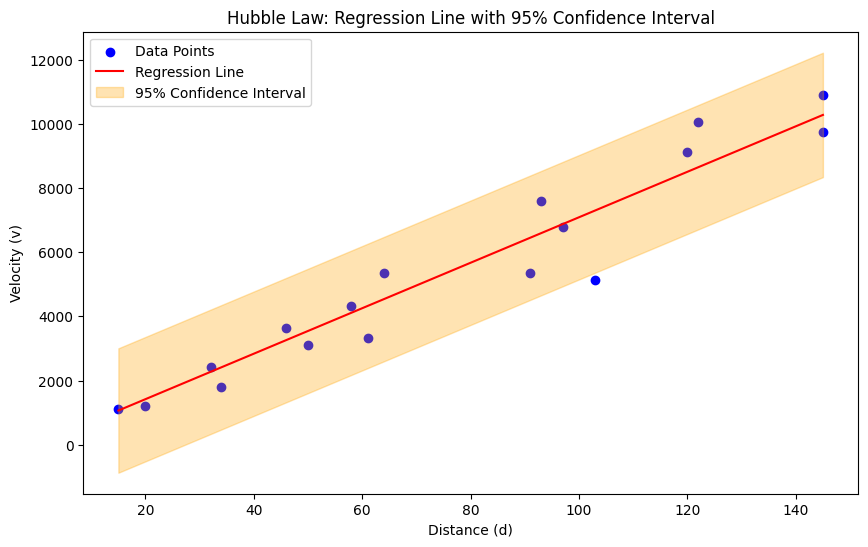

In [32]:
# Confidence level at 95%
alpha = 0.05

# Degrees of freedom (n - 2 for simple linear regression)
deg_of_freedom = len(X) - 2

# Critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha / 2, deg_of_freedom)

# Margin of error
margin_of_error = t_critical * std_err_slope

# Confidence interval for the slope
slope_ci_lower = slope - margin_of_error
slope_ci_upper = slope + margin_of_error

print(f"Slope (H0): {slope}")
print(f"Standard Error of Slope: {std_err_slope}")
print(f"95% Confidence Interval for Slope: [{slope_ci_lower}, {slope_ci_upper}]")

# Compute confidence intervals for the predicted values
y_pred_lower = y_pred - t_critical * std_err_regression
y_pred_upper = y_pred + t_critical * std_err_regression

# Plot the regression line and confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.fill_between(x_range, y_pred_lower, y_pred_upper, color='orange', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Distance (d)')
plt.ylabel('Velocity (v)')
plt.title('Hubble Law: Regression Line with 95% Confidence Interval')
plt.legend()
plt.show()

## Delete the outlier from Cook's distance plot

In [33]:
# Identify and store the index of the outlier
outlier_index = 5

# Drop the outlier from the DataFrame and reset the index
df_cleaned = df_cleaned.drop(outlier_index).reset_index(drop=True)

# Print the cleaned DataFrame
print("\nDataFrame after removing outliers:")
print(df_cleaned)


DataFrame after removing outliers:
    Apparent Magitude (m)  Absolute Magnitude (M)  Redshift (z)          m  \
0               14.541391              -16.339065      0.003676  14.541391   
1               16.756129              -18.177730      0.022604  16.756129   
2               15.829605              -16.696145      0.008038  15.829605   
3               16.294575              -19.512265      0.036352  16.294575   
4               13.829094              -19.665756      0.010395  13.829094   
5               16.039077              -17.778063      0.014448  16.039077   
6               17.138868              -17.656339      0.017838  17.138868   
7               15.998251              -19.397655      0.030485  15.998251   
8               17.910487              -16.931928      0.025338  17.910487   
9               15.164040              -18.866860      0.017838  15.164040   
10              12.484639              -23.322201      0.032552  12.484639   
11              15.601659   

# Forth Regression

## Regress with delete outliers 2

Slope(H0): 69.37123955091296
Error(MSE): 634329.3955586852
Error(H0): 0.6142699843653817
Standard Error of the Slope: 5.2949032156750215 km / (Mpc s)


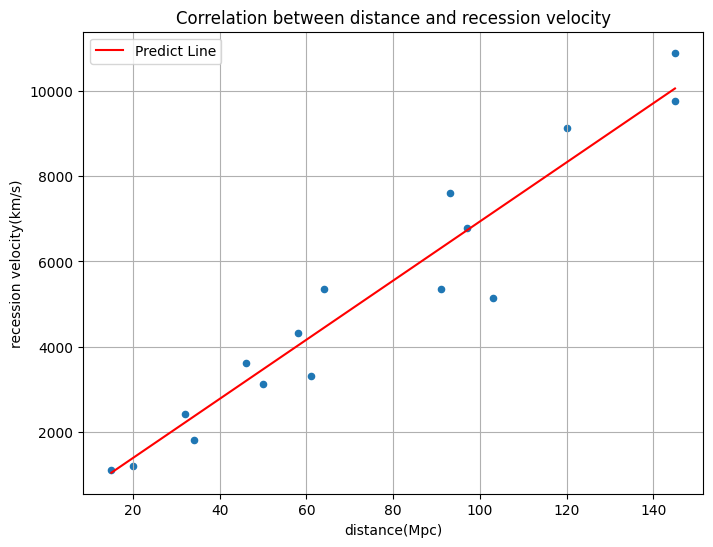

In [34]:
# do regression on making galaxy
original_order_colors = [colors[galaxies.index((d, v))] for d, v in zip(df_cleaned['d'], df_cleaned['v'])]
plt.figure(figsize = (8, 6))
plt.scatter(df_cleaned['d'], df_cleaned['v'],  s = 20)
plt.xlabel('distance(Mpc)')
plt.ylabel('recession velocity(km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)

X = df_cleaned[['d']].values
y = df_cleaned['v'].values
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
x_range = np.linspace(df_cleaned['d'].min(), df_cleaned['d'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Predict Line')

True_Hubble = 69.8
slope = model.coef_[0]
errorMSE = mean_squared_error(y, model.predict(X))
errorH0 = abs(True_Hubble - slope)/True_Hubble * 100

residuals = y - model.predict(X)
std_err_regression = np.sqrt(np.sum(residuals**2) / (len(X) - 2))
std_err_slope = std_err_regression / np.sqrt(np.sum((X[:, 0] - np.mean(X[:, 0]))**2))
std_err_slope = std_err_slope * u.km / u.s / u.Mpc

print(f"Slope(H0): {slope}")
print(f"Error(MSE): {errorMSE}")
print(f"Error(H0): {errorH0}")
print(f"Standard Error of the Slope: {std_err_slope}")

plt.legend()
plt.show()

## Calculate age of Universe

In [35]:
# Define the slope (Hubble constant) with proper units
slope = slope * u.km / u.s / u.Mpc  # Ensure slope has units of km/s/Mpc

# Convert the slope to units of 1/s (inverse time)
H0_in_s = slope.to(1 / u.s)  # Convert km/s/Mpc to 1/s

# Calculate the age of the universe in seconds
age_of_universe_seconds = 1 / H0_in_s
age_of_universe_years = age_of_universe_seconds.to(u.year)

print(f"age of universe is {age_of_universe_years} year or {age_of_universe_years / 1e9 :.2f} billion years")

# Calculate error of age of universe
error_age_of_universe_years = std_err_slope / (slope) * age_of_universe_years
print(f"Error Propagation of age of universe is {error_age_of_universe_years} years or {error_age_of_universe_years/1e9:.2f} billion years")

age of universe is 14095066312.937475 yr year or 14.10 yr billion years
Error Propagation of age of universe is 1075835064.0505905 yr years or 1.08 yr billion years


## Confidence Interval

Slope (H0): 69.37123955091296 km / (Mpc s)
Standard Error of Slope: 5.2949032156750215 km / (Mpc s)
95% Confidence Interval for Slope: [58.01480162012464 km / (Mpc s), 80.72767748170128 km / (Mpc s)]


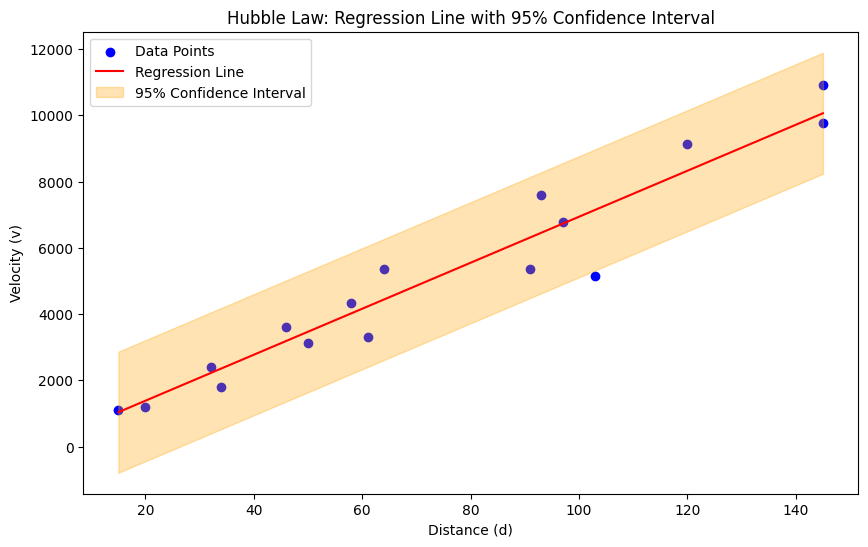

In [36]:
# Confidence level at 95%
alpha = 0.05

# Degrees of freedom (n - 2 for simple linear regression)
deg_of_freedom = len(X) - 2

# Critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha / 2, deg_of_freedom)

# Margin of error
margin_of_error = t_critical * std_err_slope

# Confidence interval for the slope
slope_ci_lower = slope - margin_of_error
slope_ci_upper = slope + margin_of_error

print(f"Slope (H0): {slope}")
print(f"Standard Error of Slope: {std_err_slope}")
print(f"95% Confidence Interval for Slope: [{slope_ci_lower}, {slope_ci_upper}]")

# Compute confidence intervals for the predicted values
y_pred_lower = y_pred - t_critical * std_err_regression
y_pred_upper = y_pred + t_critical * std_err_regression

# Plot the regression line and confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.fill_between(x_range, y_pred_lower, y_pred_upper, color='orange', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Distance (d)')
plt.ylabel('Velocity (v)')
plt.title('Hubble Law: Regression Line with 95% Confidence Interval')
plt.legend()
plt.show()